In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Read donor data

In [2]:
donor1 = pd.read_csv("data/Donor___Donor_Type_by_Donor_Age,_Donor_State_of_Residence.csv")
donor1.dropna(how='all', inplace=True)
donor1.fillna(method='ffill', inplace=True)

donor2 = pd.read_csv("data/Donor___Organ_by_Donor_Age,_Donor_State_of_Residence,_Donor_Type.csv")
donor2.dropna(how='all', inplace=True)
donor2.fillna(method='ffill', inplace=True)

donor3 = pd.read_csv("data/Donor___Organ,_Donor_Type_by_Donor_Age,_Donor_State_of_Residence,_Donor_Ethnicity.csv")
donor3.dropna(how='all', inplace=True)
donor3.fillna(method='ffill', inplace=True)

donor4 = pd.read_csv("data/Donor___Organ,_Donor_Gender_by_Donor_Type,_Donor_State_of_Residence,_Donor_Ethnicity.csv")
donor4.dropna(how='all', inplace=True)
donor4.fillna(method='ffill', inplace=True)

donor5 = pd.read_csv("data/Donor___Organ,_Donor_Gender_by_Donor_Type,_Donor_Age,_Donor_State_of_Residence.csv")
donor5.dropna(how='all', inplace=True)
donor5.fillna(method='ffill', inplace=True)

donor6 = pd.read_csv("data/Donor___Organ,_Donor_ABO_by_Donor_Type,_Donor_Age,_Donor_State_of_Residence.csv")
donor6.dropna(how='all', inplace=True)
donor6.fillna(method='ffill', inplace=True)

donor7 = pd.read_csv("data/Donor___Organ,_Donor_History_of_Diabetes_by_Donor_Type,_Donor_Age,_Donor_State_of_Residence.csv")
donor7.dropna(how='all', inplace=True)
donor7.fillna(method='ffill', inplace=True)

### Identify unique donor

In [3]:
unique_donor = donor1[(donor1["Living Donor"] == 1) & (donor1["Living Donor"] > 0)]
unique_donor[["Donor Age", "Donor State of Residence", "Living Donor"]]

,Donor Age,Donor State of Residence,Living Donor
92,< 1 Year,Ohio,1.0
93,< 1 Year,Oklahoma,1.0
150,1-5 Years,Pennsylvania,1.0
155,1-5 Years,State unassigned,1.0
171,6-10 Years,California,1.0
173,6-10 Years,Connecticut,1.0
176,6-10 Years,Florida,1.0
187,6-10 Years,Maryland,1.0
192,6-10 Years,Missouri,1.0
199,6-10 Years,New York,1.0


### Identify organ

In [4]:
temp = pd.DataFrame()

for index, row in unique_donor.iterrows():
    mask1 = donor2["Donor Age"] == row[0]
    mask2 = donor2["Donor State of Residence"] == row[1]
    mask3 = donor2["Donor Type"] == "Living Donor"
    temp = temp.append(donor2[mask1 & mask2 & mask3])

unique_donor = unique_donor.merge(temp)
unique_donor[["Donor Age", "Donor State of Residence", "Donor Type", "Kidney", "Liver", "Heart", "Pancreas", "Lung", "Intestine"]]

,Donor Age,Donor State of Residence,Donor Type,Kidney,Liver,Heart,Pancreas,Lung,Intestine
0,< 1 Year,Ohio,Living Donor,0.0,0.0,1.0,0.0,0.0,0.0
1,< 1 Year,Oklahoma,Living Donor,1.0,0.0,0.0,0.0,0.0,0.0
2,1-5 Years,Pennsylvania,Living Donor,0.0,1.0,0.0,0.0,0.0,0.0
3,1-5 Years,State unassigned,Living Donor,0.0,0.0,1.0,0.0,0.0,0.0
4,6-10 Years,California,Living Donor,0.0,1.0,0.0,0.0,0.0,0.0
5,6-10 Years,Connecticut,Living Donor,1.0,0.0,0.0,0.0,0.0,0.0
6,6-10 Years,Florida,Living Donor,1.0,0.0,0.0,0.0,0.0,0.0
7,6-10 Years,Maryland,Living Donor,0.0,1.0,0.0,0.0,0.0,0.0
8,6-10 Years,Missouri,Living Donor,0.0,1.0,0.0,0.0,0.0,0.0
9,6-10 Years,New York,Living Donor,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
organs = []
for index, row in unique_donor.iterrows():
    organ_idx = row[7:] != 0
    organ = row.index[7:][organ_idx][0]
    organs.append(organ)

unique_donor = unique_donor[["Donor Age", "Donor State of Residence", "Donor Type"]]
unique_donor.loc[:, ("Organ")] = organs
unique_donor

,Donor Age,Donor State of Residence,Donor Type,Organ
0,< 1 Year,Ohio,Living Donor,Heart
1,< 1 Year,Oklahoma,Living Donor,Kidney
2,1-5 Years,Pennsylvania,Living Donor,Liver
3,1-5 Years,State unassigned,Living Donor,Heart
4,6-10 Years,California,Living Donor,Liver
5,6-10 Years,Connecticut,Living Donor,Kidney
6,6-10 Years,Florida,Living Donor,Kidney
7,6-10 Years,Maryland,Living Donor,Liver
8,6-10 Years,Missouri,Living Donor,Liver
9,6-10 Years,New York,Living Donor,Liver


### Identify ethnicity

In [6]:
temp = pd.DataFrame()

for index, row in unique_donor.iterrows():
    mask1 = donor3["Donor Age"] == row[0]
    mask2 = donor3["Donor State of Residence"] == row[1]
    mask3 = donor3[row[3] + " - " + row[2]] == 1
    mask4 = donor3["Donor Ethnicity"] != "All Ethnicities"
    query = donor3[mask1 & mask2 & mask3 & mask4]
    query = query[["Donor Age", "Donor State of Residence", "Donor Ethnicity"]]
    temp = temp.append(query, ignore_index=True)

temp["Organ"] = unique_donor.Organ
unique_donor = unique_donor.merge(temp)

In [7]:
unique_donor

,Donor Age,Donor State of Residence,Donor Type,Organ,Donor Ethnicity
0,< 1 Year,Ohio,Living Donor,Heart,White
1,< 1 Year,Oklahoma,Living Donor,Kidney,White
2,1-5 Years,Pennsylvania,Living Donor,Liver,White
3,1-5 Years,State unassigned,Living Donor,Heart,White
4,6-10 Years,California,Living Donor,Liver,Hispanic
5,6-10 Years,Connecticut,Living Donor,Kidney,White
6,6-10 Years,Florida,Living Donor,Kidney,White
7,6-10 Years,Maryland,Living Donor,Liver,Hispanic
8,6-10 Years,Missouri,Living Donor,Liver,White
9,6-10 Years,New York,Living Donor,Liver,Asian


### Identify gender

In [8]:
genders = []

# identify gender by donor type, residence, ethnicity
for index, row in unique_donor.iterrows():
    mask1 = donor4["Donor Type"] == row[2]
    mask2 = donor4["Donor State of Residence"] == row[1]
    mask3 = donor4["Donor Ethnicity"] == row[4]
    query = donor4[mask1 & mask2 & mask3]
    # uniquely identified as male
    if (query[row[3] + " - " + "Male"].sum() == 1) & (query[row[3] + " - " + "Female"].sum() == 0):
        genders.append("Male")
    # uniquely identified as female
    elif (query[row[3] + " - " + "Male"].sum() == 0) & (query[row[3] + " - " + "Female"].sum() == 1):
        genders.append("Female")
    else:
        genders.append(np.nan)

        
# identify gender by donor type, residence, age
for index, row in unique_donor.iterrows():
    mask1 = donor5["Donor Type"] == row[2]
    mask2 = donor5["Donor Age"] == row[0]
    mask3 = donor5["Donor State of Residence"] == row[1]
    query = donor5[mask1 & mask2 & mask3]
    # uniquely identified as male
    if (query[row[3] + " - " + "Male"].sum() == 1) & (query[row[3] + " - " + "Female"].sum() == 0):
        genders[index] = "Male"
    # uniquely identified as female
    if (query[row[3] + " - " + "Male"].sum() == 0) & (query[row[3] + " - " + "Female"].sum() == 1):
        genders[index] = "Female"


unique_donor.loc[:, ("Gender")] = genders
unique_donor

,Donor Age,Donor State of Residence,Donor Type,Organ,Donor Ethnicity,Gender
0,< 1 Year,Ohio,Living Donor,Heart,White,Male
1,< 1 Year,Oklahoma,Living Donor,Kidney,White,Male
2,1-5 Years,Pennsylvania,Living Donor,Liver,White,Female
3,1-5 Years,State unassigned,Living Donor,Heart,White,Female
4,6-10 Years,California,Living Donor,Liver,Hispanic,Female
5,6-10 Years,Connecticut,Living Donor,Kidney,White,Male
6,6-10 Years,Florida,Living Donor,Kidney,White,Female
7,6-10 Years,Maryland,Living Donor,Liver,Hispanic,Male
8,6-10 Years,Missouri,Living Donor,Liver,White,Male
9,6-10 Years,New York,Living Donor,Liver,Asian,Female


### Identify blood type

In [9]:
blood_types = []

for index, row in unique_donor.iterrows():
    mask1 = donor6["Donor Type"] == row[2]
    mask2 = donor6["Donor State of Residence"] == row[1]
    mask3 = donor6["Donor Age"] == row[0]
    query = donor6[mask1 & mask2 & mask3]
    # uniquely identifiy blood type
    if query[row[3] + " - " + "All ABO"].sum() == 1:
        if query[row[3] + " - " + "O"].sum() == 1:
            blood_types.append("O")
        elif query[row[3] + " - " + "A"].sum() == 1:
            blood_types.append("A")
        elif query[row[3] + " - " + "B"].sum() == 1:
            blood_types.append("B")
        elif query[row[3] + " - " + "AB"].sum() == 1:
            blood_types.append("AB")
        else:
            blood_types.append(np.nan)

unique_donor.loc[:, ("Donor ABO")] = blood_types

In [10]:
unique_donor

,Donor Age,Donor State of Residence,Donor Type,Organ,Donor Ethnicity,Gender,Donor ABO
0,< 1 Year,Ohio,Living Donor,Heart,White,Male,O
1,< 1 Year,Oklahoma,Living Donor,Kidney,White,Male,O
2,1-5 Years,Pennsylvania,Living Donor,Liver,White,Female,A
3,1-5 Years,State unassigned,Living Donor,Heart,White,Female,O
4,6-10 Years,California,Living Donor,Liver,Hispanic,Female,A
5,6-10 Years,Connecticut,Living Donor,Kidney,White,Male,B
6,6-10 Years,Florida,Living Donor,Kidney,White,Female,O
7,6-10 Years,Maryland,Living Donor,Liver,Hispanic,Male,O
8,6-10 Years,Missouri,Living Donor,Liver,White,Male,O
9,6-10 Years,New York,Living Donor,Liver,Asian,Female,A


### Identify diabetes history

In [11]:
diabetes_categories = ['NA before 4/1/1994', 'NO', 'UNKNOWN', 'YES, >10 YEARS', 'YES, 0-5 YEARS', 'YES, 6-10 YEARS', 'YES, UNKNOWN DURATION']
diabetes = []

for index, row in unique_donor.iterrows():
    mask1 = donor7["Donor Type"] == row[2]
    mask2 = donor7["Donor State of Residence"] == row[1]
    mask3 = donor7["Donor Age"] == row[0]
    query = donor7[mask1 & mask2 & mask3]
    # uniquely identifiy diabete
    if query[row[3] + " - " + "All History of Diabetes"].sum() == 1:
        for category in diabetes_categories:
            if query[row[3] + " - " + category].sum() == 1:
                diabetes.append(category)

unique_donor.loc[:, ("Donor History_of_Diabetes")] = diabetes

In [12]:
unique_donor

,Donor Age,Donor State of Residence,Donor Type,Organ,Donor Ethnicity,Gender,Donor ABO,Donor History_of_Diabetes
0,< 1 Year,Ohio,Living Donor,Heart,White,Male,O,NA before 4/1/1994
1,< 1 Year,Oklahoma,Living Donor,Kidney,White,Male,O,NA before 4/1/1994
2,1-5 Years,Pennsylvania,Living Donor,Liver,White,Female,A,NA before 4/1/1994
3,1-5 Years,State unassigned,Living Donor,Heart,White,Female,O,NA before 4/1/1994
4,6-10 Years,California,Living Donor,Liver,Hispanic,Female,A,NA before 4/1/1994
5,6-10 Years,Connecticut,Living Donor,Kidney,White,Male,B,NA before 4/1/1994
6,6-10 Years,Florida,Living Donor,Kidney,White,Female,O,NA before 4/1/1994
7,6-10 Years,Maryland,Living Donor,Liver,Hispanic,Male,O,NA before 4/1/1994
8,6-10 Years,Missouri,Living Donor,Liver,White,Male,O,NA before 4/1/1994
9,6-10 Years,New York,Living Donor,Liver,Asian,Female,A,NA before 4/1/1994


### Differential privacy + simple histogram example

In [116]:
donors_age = donor1[donor1["Donor Age"] != "All Ages"].groupby(by="Donor Age").sum().reset_index()
donors_age = donors_age[["Donor Age", "Deceased Donor", "Living Donor"]]
donors_age["Privacy"] = "Non-DP"

donors_age_DP = donors_age.copy()
donors_age_DP["Living Donor"] = donors_age["Living Donor"] + [np.abs(int(np.random.laplace(0, 1/0.1))) for _ in range(len(donors_age))]
donors_age_DP["Deceased Donor"] = donors_age["Deceased Donor"] + [np.abs(int(np.random.laplace(0, 1/0.1))) for _ in range(len(donors_age))]
donors_age_DP["Privacy"] = "DP"
donors_age = donors_age.append(donors_age_DP)

donors_age

,Donor Age,Deceased Donor,Living Donor,Privacy
0,1-5 Years,13543.0,4.0,Non-DP
1,11-17 Years,33073.0,130.0,Non-DP
2,18-34 Years,127958.0,109642.0,Non-DP
3,35-49 Years,117056.0,144519.0,Non-DP
4,50-64 Years,108082.0,72052.0,Non-DP
5,6-10 Years,8851.0,12.0,Non-DP
6,65 +,32113.0,5979.0,Non-DP
7,< 1 Year,6792.0,4.0,Non-DP
8,Unknown,5.0,46.0,Non-DP
0,1-5 Years,13547.0,4.0,DP


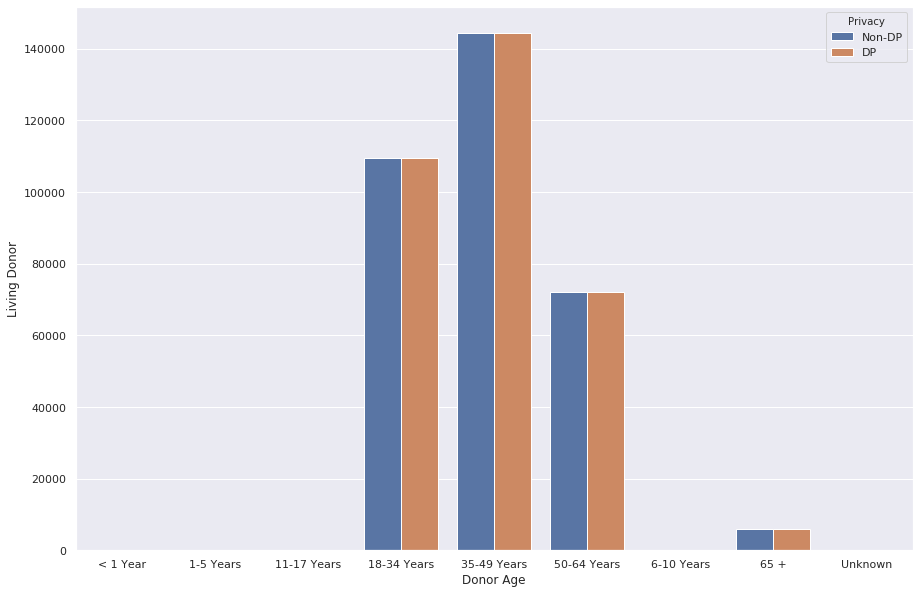

In [113]:
plt.figure(figsize=(15, 10))
sns.barplot(x = "Donor Age", y = "Living Donor", data = donors_age, hue="Privacy", 
            order=['< 1 Year', '1-5 Years', '11-17 Years', '18-34 Years', '35-49 Years', '50-64 Years', '6-10 Years', '65 +', 'Unknown']);

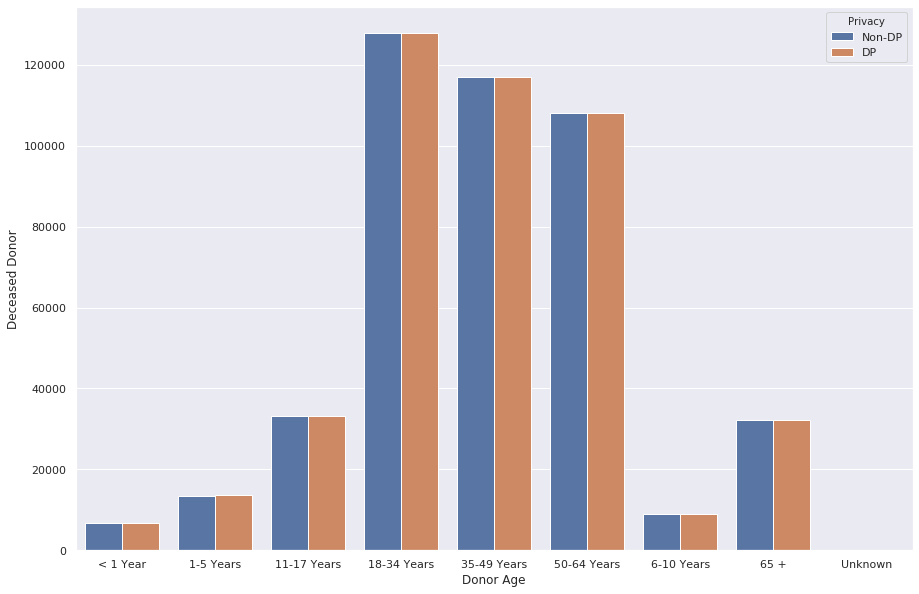

In [115]:
plt.figure(figsize=(15, 10))
sns.barplot(x = "Donor Age", y = "Deceased Donor", data = donors_age, hue="Privacy",
           order=['< 1 Year', '1-5 Years', '11-17 Years', '18-34 Years', '35-49 Years', '50-64 Years', '6-10 Years', '65 +', 'Unknown']);